In [1]:
import pandas as pd 
from sklearn import svm, metrics, tree, ensemble
from sklearn.model_selection import  train_test_split 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [116]:
corr_csv = pd.read_csv("./dataset/total_corr_0831.csv")
corr_df = pd.DataFrame(corr_csv)

In [117]:
corr_df

,E_len,S_len,ESC,LES,RES,NS
0,0.111488,0.509276,0.395772,0.403213,0.388332,0.358737
1,0.110458,0.509276,0.397252,0.404172,0.390332,0.362397
2,0.099601,0.508697,0.389507,0.395757,0.383258,0.351375
3,0.101697,0.525211,0.373120,0.373391,0.372848,0.315857
4,0.102249,0.533296,0.373741,0.370073,0.377408,0.314963
...,...,...,...,...,...,...
1569,0.050317,0.334209,0.416407,0.403833,0.428981,0.327594
1570,0.069206,0.377959,0.416186,0.398217,0.434156,0.322900
1571,0.074389,0.453096,0.440528,0.417404,0.463652,0.362690
1572,0.050578,0.376804,0.420304,0.398234,0.442373,0.337952


In [118]:
corr_total = corr_df.copy()

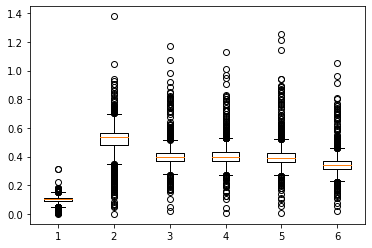

In [119]:
# Basic box plot
import matplotlib.pyplot as plt
%matplotlib inline 


a = plt.boxplot(corr_total)
plt.show()

In [120]:
corr_total = corr_total.dropna()

In [121]:
corr_modi_df = corr_total

In [122]:
c_labels = ["0" for i in range(len(corr_modi_df))]
c_labels_df = pd.DataFrame(c_labels, columns=["c_labels"]); c_labels_df

,c_labels
0,0
1,0
2,0
3,0
4,0
...,...
1569,0
1570,0
1571,0
1572,0


In [123]:
# corr_data = corr_ratio_df.join(c_labels_df, how="right"); corr_data.head()
corr_modi_df = corr_modi_df.join(c_labels_df, how="right"); 

In [124]:
corr_modi_df

,E_len,S_len,ESC,LES,RES,NS,c_labels
0,0.111488,0.509276,0.395772,0.403213,0.388332,0.358737,0
1,0.110458,0.509276,0.397252,0.404172,0.390332,0.362397,0
2,0.099601,0.508697,0.389507,0.395757,0.383258,0.351375,0
3,0.101697,0.525211,0.373120,0.373391,0.372848,0.315857,0
4,0.102249,0.533296,0.373741,0.370073,0.377408,0.314963,0
...,...,...,...,...,...,...,...
1569,0.050317,0.334209,0.416407,0.403833,0.428981,0.327594,0
1570,0.069206,0.377959,0.416186,0.398217,0.434156,0.322900,0
1571,0.074389,0.453096,0.440528,0.417404,0.463652,0.362690,0
1572,0.050578,0.376804,0.420304,0.398234,0.442373,0.337952,0


In [125]:
forw_csv = pd.read_csv("./dataset/total_forw_0831.csv") 
forw_df = pd.DataFrame(forw_csv); forw_df

,E_len,S_len,ESC,LES,RES,NS
0,0.117220,0.521142,0.335206,0.321549,0.348864,0.284205
1,0.115567,0.521469,0.336075,0.323239,0.348912,0.284684
2,0.115526,0.527598,0.338677,0.328034,0.349321,0.285925
3,0.109465,0.525332,0.304367,0.295484,0.313250,0.244219
4,0.108766,0.524268,0.299489,0.291270,0.307709,0.238228
...,...,...,...,...,...,...
1571,0.108992,0.431116,0.421152,0.445476,0.396827,0.341751
1572,0.107505,0.474848,0.420175,0.456049,0.384301,0.335194
1573,0.117135,0.463106,0.407972,0.447593,0.368351,0.320367
1574,0.122345,0.491012,0.387042,0.402736,0.371347,0.303367


In [126]:
forw_total = forw_df.copy()

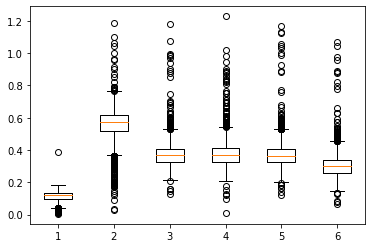

In [127]:
# Basic box plot
import matplotlib.pyplot as plt
%matplotlib inline 


b = plt.boxplot(forw_total)
plt.show()

In [128]:
forw_modi_df = forw_total

In [129]:
f_labels = ["1" for i in range(len(forw_modi_df))]
f_labels_df = pd.DataFrame(f_labels, columns=["f_labels"]); f_labels_df

,f_labels
0,1
1,1
2,1
3,1
4,1
...,...
1571,1
1572,1
1573,1
1574,1


In [130]:
# forw_data = forw_ratio_df.join(f_labels_df, how="right")
forw_modi_df = forw_modi_df.join(f_labels_df, how="right"); forw_modi_df.head()

,E_len,S_len,ESC,LES,RES,NS,f_labels
0,0.117220,0.521142,0.335206,0.321549,0.348864,0.284205,1
1,0.115567,0.521469,0.336075,0.323239,0.348912,0.284684,1
2,0.115526,0.527598,0.338677,0.328034,0.349321,0.285925,1
3,0.109465,0.525332,0.304367,0.295484,0.313250,0.244219,1
4,0.108766,0.524268,0.299489,0.291270,0.307709,0.238228,1


In [131]:
corr_modi_df.columns = ["E_len", "S_len", "ESC", "LES", "RES", "NS", "labels"]
forw_modi_df.columns = ["E_len", "S_len", "ESC", "LES", "RES", "NS", "labels"]

In [132]:
total_data = pd.concat([corr_modi_df, forw_modi_df])

In [133]:
total_data.to_csv("mp_Concat_0831.csv", encoding="utf-8")

In [134]:
total_csv = pd.read_csv("mp_Concat_0831.csv")
total_data = pd.DataFrame(total_csv).drop(["Unnamed: 0"], axis=1)

In [135]:
total_data.head()

,E_len,S_len,ESC,LES,RES,NS,labels
0,0.111488,0.509276,0.395772,0.403213,0.388332,0.358737,0
1,0.110458,0.509276,0.397252,0.404172,0.390332,0.362397,0
2,0.099601,0.508697,0.389507,0.395757,0.383258,0.351375,0
3,0.101697,0.525211,0.373120,0.373391,0.372848,0.315857,0
4,0.102249,0.533296,0.373741,0.370073,0.377408,0.314963,0


In [143]:
data_shuffled = total_data.sample(frac=1)  # row 전체 shuffle

data_shuffled = total_data.sample(frac=1).reset_index(drop=True)  # shuffling하고 index reset
data_shuffled = data_shuffled.dropna()
data_shuffled

,E_len,S_len,ESC,LES,RES,NS,labels
0,0.113970,0.553171,0.338992,0.317869,0.360114,0.274821,1
1,0.131278,0.609507,0.373820,0.368870,0.378771,0.300057,1
2,0.151590,0.452095,0.340875,0.320847,0.360904,0.278671,0
3,0.105889,0.546746,0.366558,0.365329,0.367786,0.310559,0
4,0.133128,0.627213,0.311183,0.314707,0.307658,0.236257,1
...,...,...,...,...,...,...,...
3145,0.110125,0.520821,0.369855,0.389420,0.350289,0.326688,0
3146,0.092982,0.616832,0.436496,0.541217,0.331776,0.323974,1
3147,0.081878,0.541962,0.412072,0.466451,0.357693,0.334769,1
3148,0.152461,0.689236,0.321492,0.322252,0.320733,0.232815,1


In [144]:
pose_data = data_shuffled[["E_len", "S_len", "ESC", "LES", "RES", "NS"]]

pose_label = data_shuffled["labels"]

In [145]:
train_data, test_data , train_label, test_label  =  train_test_split(pose_data, pose_label, test_size=0.2, random_state=1)

# help( train_test_split )

In [146]:
scaler = StandardScaler()
base_model = svm.SVC(kernel='rbf')
pipe = Pipeline([('scaler', scaler), ('base_model', base_model)])

In [45]:
from sklearn.model_selection import GridSearchCV

In [160]:
params = { 'n_estimators' : [1, 10, 100, 1000],
           'max_depth' : [1, 10, 100],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(train_data, train_label)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 100, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 1000}
최고 예측 정확도: 0.8500


In [163]:
print("학습 결과", grid_cv.score(train_data, train_label))

학습 결과 0.9214285714285714


In [161]:
from sklearn.metrics import accuracy_score
#위의 결과로 나온 최적 하이퍼 파라미터로 다시 모델을 학습하여 테스트 세트 데이터에서 예측 성능을 측정
rf_clf1 = RandomForestClassifier(n_estimators = 1000, 
                                max_depth = 100,
                                min_samples_leaf = 8,
                                min_samples_split = 8,
                                random_state = 0,
                                n_jobs = -1)
rf_clf1.fit(train_data, train_label)
pred = rf_clf1.predict(test_data)
print('예측 정확도: {:.4f}'.format(accuracy_score(test_label,pred)))

예측 정확도: 0.8905


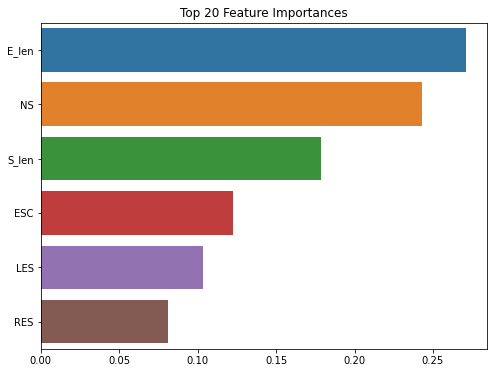

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = train_data.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [147]:
parameters = {'base_model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
          'base_model__gamma': [0.0001, 0.001, 0.01, 1, 10, 100, 1000]}
# grid search Part
grid = GridSearchCV(estimator=pipe, param_grid=parameters, cv=5, n_jobs=-1)
grid.fit(train_data, train_label)

# grid search 결과 출력
# print(grid)
print(grid.best_score_)
print(grid.best_estimator_)
# print(grid.predict(test_data))
print("학습 결과", grid.score(train_data, train_label))
print("테스트 결과", grid.score(test_data, test_label))

0.8726190476190476
Pipeline(steps=[('scaler', StandardScaler()),
                ('base_model', SVC(C=10, gamma=1))])
학습 결과 0.9496031746031746
테스트 결과 0.8984126984126984


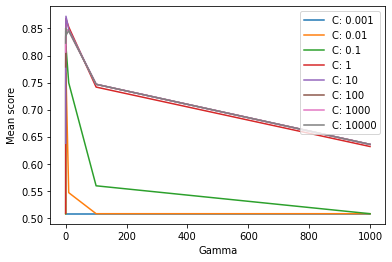

In [148]:
#시각화
scores = grid.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(parameters['base_model__C']), len(parameters['base_model__gamma']))
for ind, i in enumerate(parameters['base_model__C']):
    plt.plot(parameters['base_model__gamma'], scores[ind], label='C: ' + str(i))
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Mean score')
plt.show()

In [114]:
print(grid_cv.best_estimator_)

RandomForestClassifier(max_depth=10, min_samples_leaf=12, min_samples_split=8,
                       n_estimators=10, n_jobs=-1, random_state=0)


In [115]:
#model 저장
import joblib
best_model = grid_cv.best_estimator_
joblib.dump(best_model,'./SVM(randomforest).pkl')

['./SVM(randomforest).pkl']

In [110]:
print(model4)

RandomForestClassifier()


In [149]:
# 이상치 제거 전
model = svm.SVC(  )
model.fit(train_data, train_label  ) 
pre = model.predict( test_data )
ac_score = metrics.accuracy_score( test_label, pre ) 
print("SVC 정답률 = " , ac_score)

SVC 정답률 =  0.8365079365079365


In [150]:
# 제거 전
model1 = tree.DecisionTreeClassifier()
model1.fit(train_data, train_label)
pre1 = model1.predict(test_data)
ac_score1 = metrics.accuracy_score(test_label, pre1)
print("의사결정 트리 정답률 = ", ac_score1)

의사결정 트리 정답률 =  0.8523809523809524


In [151]:
# 제거 전
model3 = tree.ExtraTreeClassifier()
model3.fit(train_data, train_label)
pre3 = model3.predict(test_data)
ac_score3 = metrics.accuracy_score(test_label, pre3)
print("엑스트라 트리 회귀 정답률 = ", ac_score3)

엑스트라 트리 회귀 정답률 =  0.8206349206349206


In [152]:
# 제거 전
model4 = ensemble.RandomForestClassifier()
model4.fit(train_data, train_label)
pre4 = model4.predict(test_data)
ac_score4 = metrics.accuracy_score(test_label, pre4)
print("앙상블 랜덤포레스트 정답률 = ", ac_score4)

앙상블 랜덤포레스트 정답률 =  0.8857142857142857


In [153]:
# 제거 전
model5 = ensemble.AdaBoostClassifier()
model5.fit(train_data, train_label)
pre5 = model5.predict(test_data)
ac_score5 = metrics.accuracy_score(test_label, pre5)
print("아다부스트 정답률 = ", ac_score5)

아다부스트 정답률 =  0.8380952380952381


In [154]:
# 제거 전
model6 = ensemble.BaggingClassifier()
model6.fit(train_data, train_label)
pre6 = model6.predict(test_data)
ac_score6 = metrics.accuracy_score(test_label, pre6)
print("배깅 정답률 = ", ac_score6)

배깅 정답률 =  0.8746031746031746


In [155]:
# 제거 전
model7 = ensemble.GradientBoostingClassifier()
model7.fit(train_data, train_label)
pre7 = model7.predict(test_data)
ac_score7 = metrics.accuracy_score(test_label, pre7)
print("경사 부스팅 정답률 = ", ac_score7)


경사 부스팅 정답률 =  0.8825396825396825


In [156]:
# 제거 전
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
model8 = ensemble.StackingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)])
model8.fit(train_data, train_label)
pre8 = model8.predict(test_data)
ac_score8 = metrics.accuracy_score(test_label, pre8)
print("스태킹 정답률 = ", ac_score8)

스태킹 정답률 =  0.8920634920634921


In [157]:
# 제거 전
model9 = ensemble.VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting="hard")
model9.fit(train_data, train_label)
pre9 = model9.predict(test_data)
ac_score9 = metrics.accuracy_score(test_label, pre9)
print("보팅 하드 정답률 = ", ac_score9)

보팅 하드 정답률 =  0.8253968253968254


In [158]:
# 제거 전
model9_1 = ensemble.VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting="soft")
model9_1.fit(train_data, train_label)
pre9_1 = model9_1.predict(test_data)
ac_score9_1 = metrics.accuracy_score(test_label, pre9_1)
print("보팅 소프트 정답률 = ", ac_score9_1)

보팅 소프트 정답률 =  0.873015873015873


In [159]:
# 제거 전
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
model10 = ensemble.HistGradientBoostingClassifier()
model10.fit(train_data, train_label)
pre10 = model10.predict(test_data)
ac_score10 = metrics.accuracy_score(test_label, pre10)
print("히스트그래디언트부스팅 정답률 = ", ac_score10)

히스트그래디언트부스팅 정답률 =  0.8873015873015873
